kmeans clustering

hirarchical clustering

dbscan clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans
#take different e.g
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0],[100,110],[1000,1200]])

In [3]:
X.dtype

dtype('int32')

In [4]:
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [5]:
kmeans = KMeans(n_clusters=4) #creating 4 cluster or 4 centroid =hyperparameter

In [6]:
kmeans.fit(X)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [7]:
kmeans.labels_ #first 3 points near to each next 3 points near to each other and othe points are belong to separate 0,1,2,3 are 4 cluster for points in x

array([3, 3, 3, 0, 0, 0, 2, 1])

In [8]:
data=pd.DataFrame(X)

In [9]:
labels=pd.DataFrame(kmeans.labels_)

In [10]:
datawithlabel=pd.concat([data,labels],axis=1) #to add which cluster in data 

In [11]:
datawithlabel

,0,1,0
0,1,2,3
1,1,4,3
2,1,0,3
3,10,2,0
4,10,4,0
5,10,0,0
6,100,110,2
7,1000,1200,1


In [12]:
np.array([[0, 0], [12, 3]])

array([[ 0,  0],
       [12,  3]])

In [13]:
kmeans.predict([[0, 0], [12, 3]]) #just predicting data point belongs to which cluster

array([3, 0])

In [14]:
kmeans.cluster_centers_


array([[1.0e+01, 2.0e+00],
       [1.0e+03, 1.2e+03],
       [1.0e+02, 1.1e+02],
       [1.0e+00, 2.0e+00]])

In [32]:
#example 2

In [15]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=10)

In [16]:
X #two feature just to show in 2 d

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [33]:
y #centeres/centroid/cluster 0,1,2

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

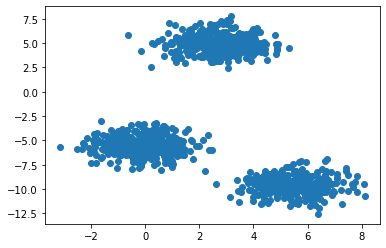

In [18]:
plt.scatter(X[:,0],X[:,1])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [34]:
wcss=[]
for k in range(2,11):
    kmean=KMeans(n_clusters=k,init="k-means++")
    kmean.fit(X_train)
    wcss.append(kmean.inertia_) #inertai means wcss value
    

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [21]:
wcss

[6350.499237030181,
 1230.8405264123764,
 1080.1810547616722,
 934.5023320781823,
 814.8883510648568,
 701.955486329617,
 610.7194043809181,
 528.8020595321052,
 486.9156267822688]

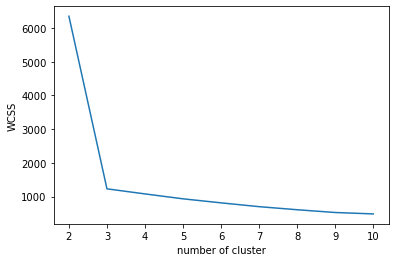

In [22]:
plt.plot(range(2,11),wcss)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

In [35]:
# 3 clusters are optimal and also proved below

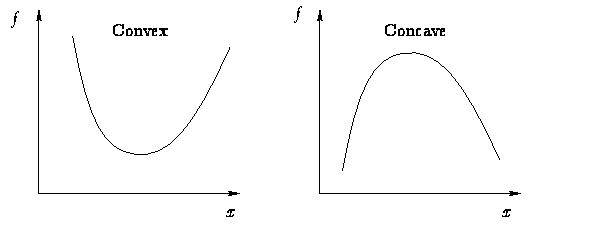|

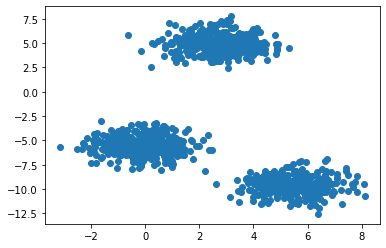

In [23]:
plt.scatter(X[:,0],X[:,1])

In [24]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [25]:
y_lables=kmeans.fit_predict(X_train)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [26]:
y_lables

array([2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       1, 1, 0, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 1, 1,
       1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0,
       1, 1, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 2,
       1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 1, 2,

In [27]:
y_train

array([2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       0, 2, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 1, 2, 2, 0, 1, 1,
       2, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2, 0, 1, 0, 2,

In [28]:
X_train[:,0]

array([-1.41832204e+00,  4.48697951e+00,  2.24704936e-01,  5.02494005e+00,
       -1.20566991e+00, -2.40528658e-01,  4.53522594e+00,  3.24289824e+00,
        6.37353894e+00,  3.51963962e+00,  9.40643276e-01,  3.33435966e+00,
       -1.84803616e+00,  2.79746994e-01, -1.66299054e-01,  9.88739486e-01,
        1.10858193e+00, -6.71428928e-01,  3.03222019e+00, -1.88949319e-01,
        5.37758235e+00,  3.97323375e+00,  6.51163994e+00,  5.26001217e+00,
        3.87259410e+00,  5.29579194e+00,  2.93975071e+00, -1.42179319e+00,
        4.34083423e+00,  2.43172588e+00, -9.12224291e-01, -1.78309239e+00,
        3.39546910e+00,  3.44338367e+00,  1.55855578e+00,  5.45250939e+00,
        7.83073847e+00,  6.23354172e-01,  6.40648699e+00,  8.18809420e-01,
        6.70146197e+00,  3.83803205e+00,  2.66513548e+00,  4.98738663e+00,
        1.24625586e+00,  6.34773330e+00,  5.61898570e+00, -1.03617272e+00,
        3.71294266e+00,  9.25618971e-01,  3.17537051e+00,  4.87785040e+00,
        1.25485940e-01,  

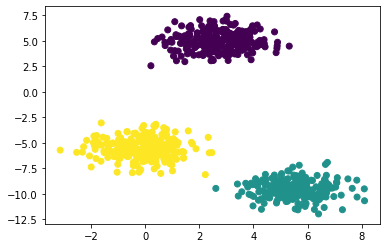

In [29]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_lables) #c=colour

In [30]:
wcss

[6350.499237030181,
 1230.8405264123764,
 1080.1810547616722,
 934.5023320781823,
 814.8883510648568,
 701.955486329617,
 610.7194043809181,
 528.8020595321052,
 486.9156267822688]

In [36]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [37]:
from kneed import KneeLocator

In [38]:
k=KneeLocator(range(2,11),wcss,curve='convex',direction='decreasing')

In [39]:
k.elbow

3

In [40]:
from sklearn.metrics import silhouette_score

In [41]:
from sklearn.cluster import KMeans
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\akshay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [42]:
silhouette_coefficients

[0.7273220153669463,
 0.7835543034796946,
 0.6288426745092959,
 0.44686935826445306,
 0.31080129481394175,
 0.3258332878976107,
 0.34171293169304845,
 0.34842964023956247,
 0.33932367582947087]

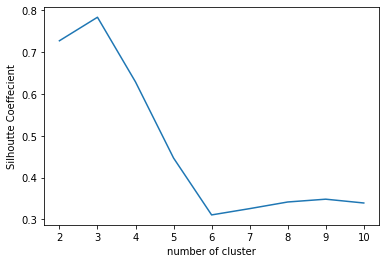

In [43]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("number of cluster")
plt.ylabel("Silhoutte Coeffecient")
plt.show()

In [45]:
# from above graph it is proved cluster 3 is good bcoz we get s.score near to 1

In [46]:
# you have a data set

# unsupervised+supervised=semisupervised

classification data(wafer data)

you have a multiple files 

take all the files and create a single dataframe

then you have to perform clustering(kmean,hirarchical,dbscan)

after clustering the data will be segeregated in different clsuters

then you have to perform supervised mllearning(log reg,svc,DTC,RF, boosting classifier) on each and every cluster
and find out the best algorithm
#https://github.com/sunnysavita10/svm_kernel data inside it

SyntaxError: invalid syntax (Temp/ipykernel_15968/399180244.py, line 5)